In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df_cleaned = df.drop(columns=['car_ID', 'CarName'])
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [4]:
X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.8948587586031806
Mean Squared Error: 8300272.356143635


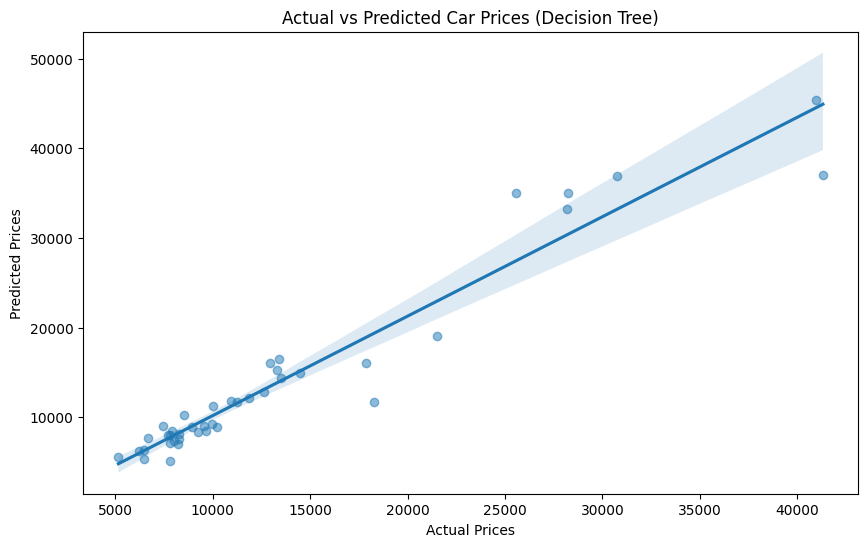

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (Decision Tree)")
plt.show()